# Corto 1 - Modelacion y Simulacion
Marco Jurado 20308 <br>
Cristian Aguirre 20231

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

## Parte 1 
### Tasks 1
Suponga que usted está trabajando en la industria relacionada con meteorología, por lo cual le interesa saber la
probabilidad de que haya N huracanes este año. Se sabe que la frecuencia histórica de huracanes es 7 por año, en
otras palabras, el número promedio de huracanes por año es de 7.
1. ¿Es este un escenario que se pueda modelar como una variable aleatoria de Poisson? ¿Por qué?<br><br>
En el caso de evaluar los huracanes al año podemos pensar en poner la variable de la cantidad de huracanes o la ocurrencia del evento que un huracan suceda como la varuable aleatoria de Poisson. Esto tambien permite darle el valor lambda o valor promedio a esta variable de 7 al año.<br><br><br>
2. Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique PMF (probability mass function) de estos eventos<br><br>
3. Considere que usted analizará hasta un máximo de 16 huracanes este año. Grafique CDF (cumulative distribution function) de estos eventos <br><br>

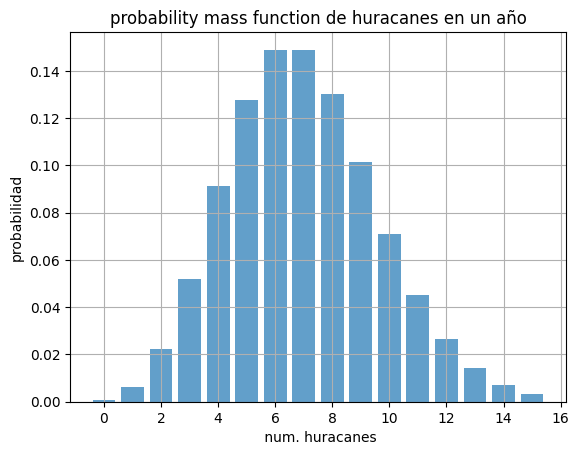

In [4]:
# pregunta 2
resultados = [i for i in range(16)] # 16 huracanes

# poisson
pmf = poisson.pmf(resultados, 7)

# grafico
plt.bar(resultados, pmf,alpha=0.7)
plt.xlabel(' num. huracanes')
plt.ylabel('probabilidad')
plt.title('probability mass function de huracanes en un año')
plt.grid(True)
plt.show()

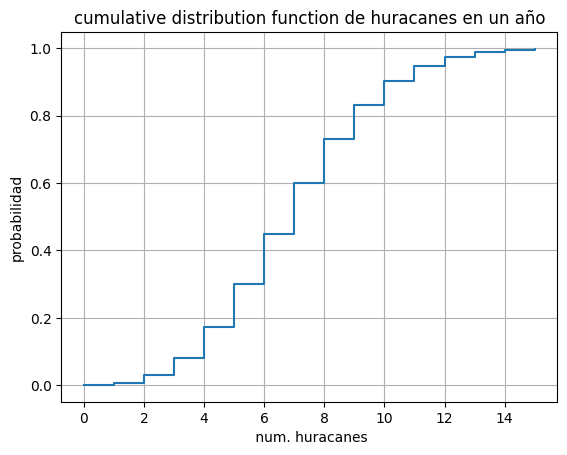

In [5]:
# pregunta 3
resultados = [i for i in range(16)] # 16 huracanes

# poisson
cdf = poisson.cdf(resultados, 7)

# Graficar la CDF
plt.step(resultados, cdf, where='post')
plt.xlabel(' num. huracanes')
plt.ylabel('probabilidad')
plt.title('cumulative distribution function de huracanes en un año')
plt.grid(True)
plt.show()

4. ¿Qué conclusiones puede sacar al observar las gráficas de los ejercicios anteriores? <br><br>
Al ver primero la gráfica de pmf se puede ver una forma de campana en el centro y esto concuerda con el valor promedio que nos dan de 7 huracanes al año. Esto tambien nos dice que al tener menos o más de este valor al año podemos ver una probabilidad constantemente menor a medida que nos vamos alejando del valor lambda. <br><br>
Luego al ver la grafica de cdf podemos ver que este va aumentando la probabilidad acumulada a medida que van comenzando a incrementarse cada vez que vamos teniendo más huracanes. Luego tenemos el salto más grande en la probabilidad justo en el valor de lambda de la distribución de poisson (7 huracanes al año) y finalmente esto va a ir incrementando cada vez más hasta llegar al valor de 15 y tener un valor 1 lo cual dice que la probabilidad acumulada de que el evento acontezca.<br><br>
Se puede concluir que la probabilidad de tener más de de 7 huracanes o menos de 7 es algo no tan probable pero posible. Sin embargo si se evaluaran más de 16 huracanes al año esto sería un evento con una probabilidad muy baja así como lo es la probabilidad de que acontezcan 0 huracanes al año. 

### Tasks 2
Usted es un analista de simulación encargado de modelar la llegada de clientes a una tienda minorista. Desea
simular la cantidad de clientes que llegan por hora utilizando dos métodos diferentes: el método de transformación
inversa y el método de rechazo.
#### Task 2.1
Defina la distribución de probabilidad objetivo para las llegadas de clientes en función de los datos históricos.
Supongamos que ha recopilado datos y descubrió que la cantidad de clientes que llegan por hora sigue una
distribución de Poisson con un promedio de 10 clientes por hora (λ = 10).
1. Implemente el método de transformación inversa para generar muestras aleatorias a partir de la distribución de Poisson.
2. Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una hora.

Con el pseudo algoritmo investigado de:
Giménez, J. (2013). Modelos y Simulación - Clase 9. Recuperado de http://www2.famaf.unc.edu.ar/~jgimenez/Modelos_y_Simulacion/2013/clase9.pdf

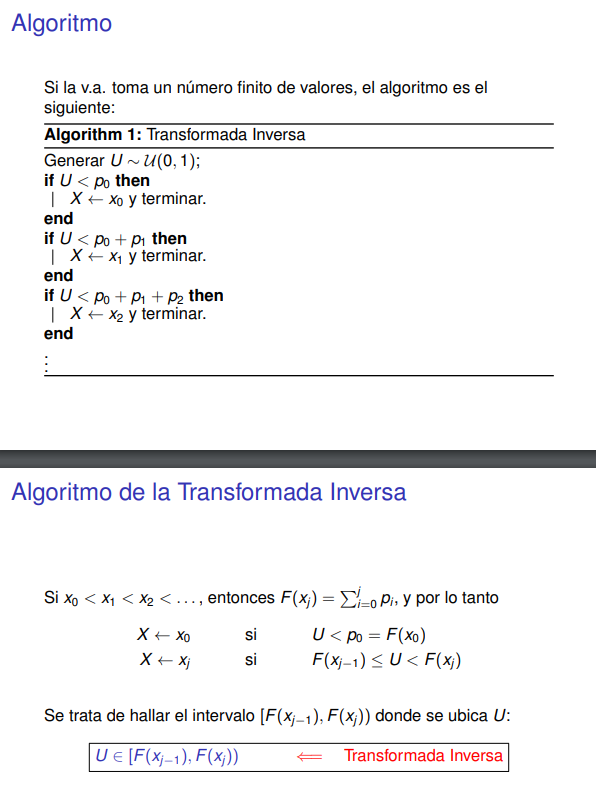

In [6]:
# transformación inversa (ej1)
def ej1Inversa(elementos,temp):
    X = np.zeros(elementos)
    for j in range(elementos):
        U = np.random.uniform()
        x = 0
        s = np.exp(-temp)

        while U > s:
            x += 1
            s += np.exp(-temp) * (temp ** x) / np.math.factorial(x)

        X[j] = x

    return X


In [7]:
# 1000 elementos con lambda 10 
muestra = ej1Inversa(1000,10)

3. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.
4. Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos

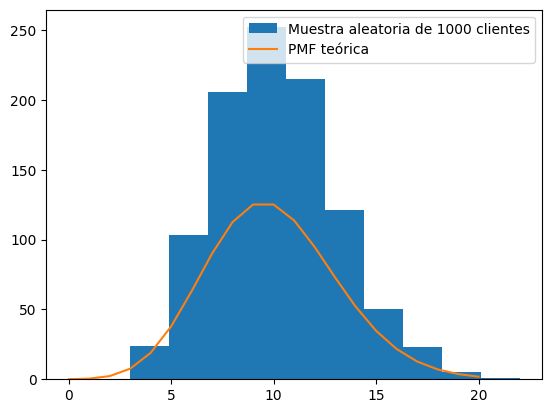

In [23]:
x = np.arange(0, 21) # mejor rango visualmente para graficar despues de probar desde 10 hasta 50 clientes
plt.hist(muestra, label="Muestra aleatoria de 1000 clientes")
pmf = poisson.pmf(x, 10) * 1000
plt.plot(x, pmf, label="PMF teórica")
plt.legend()
plt.show()

In [24]:
media = np.mean(muestra)
varianza = np.var(muestra)

diferencia_media = 10 - media
diferencia_varianza = 10 - varianza

print(" La media obtenida en la muestra es de: ", media)
print(" La varianza obtenida en la muestra es de: ", varianza)
print("\nEsto significa que con los valores teoricos de 10 hay una diferencia en media de " + str(diferencia_media) + "\ny una diferencia en la varianza de " + str(diferencia_varianza) + "\n\n")

p_error_Media = abs(10 - media) / 10 * 100
p_error_Varianza = abs(10 - varianza) / 10 * 100

print("Porcentaje de error en la media:", p_error_Media, "%")
print("Porcentaje de error en la varianza:", p_error_Varianza, "%")

 La media obtenida en la muestra es de:  9.983
 La varianza obtenida en la muestra es de:  9.580710999999999

Esto significa que con los valores teoricos de 10 hay una diferencia en media de 0.01699999999999946
y una diferencia en la varianza de 0.4192890000000009


Porcentaje de error en la media: 0.1699999999999946 %
Porcentaje de error en la varianza: 4.192890000000009 %


Al observar los datos podemos ver que se obtuvo una varianza de 9.58 y una media de 9.83 lo cual al compararlo con los valores teoricos de 10 para esta distribución nos da una diferencia de 0.016 menos en la media y 0.41 menos en la varianza. <br><br>
Esto representa un 0.16% de error en la media y un 4.19% de error en la varianza respecto al valor teorico.

#### Task 2.2
Defina una distribución de propuesta que sea más fácil de muestrear y que cubra el soporte de la distribución de
Poisson de destino. Por ejemplo, puede elegir una distribución uniforme o geométrica.
1. Calcule la constante C para acotar la relación entre el PMF objetivo y el PMF propuesto en todo el soporte de la distribución de Poisson.
2. Implemente el método de rechazo para generar muestras aleatorias a partir de la distribución de Poisson.
3. Genere una muestra aleatoria de tamaño 1000 que represente el número de clientes que llegan en una hora utilizando el método de rechazo.
4. Trace un histograma de la muestra generada y compárelo con el PMF teórico de la distribución de Poisson.
5. Calcule la media y la varianza de la muestra generada y compárelas con los valores teóricos

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [31]:
lambda_v = 10
max_x = 4 * lambda_v 

Calcular constance C

In [32]:
C  = 0

for i in range(0, max_x):
    pmf = poisson.pmf(i, lambda_v)
    if pmf > C:
        C = pmf

Generar muestra

In [33]:
muestras = []

for _ in range(1000):
    muestra = Metodo_De_Rechazo() # Genera una muestra utilizando la función definida anteriormente
    muestras.append(muestra)

NameError: name 'Metodo_De_Rechazo' is not defined

## Preguntas
1. Compare los resultados de los dos métodos. ¿Qué método proporciona un mejor ajuste a la distribución de Poisson objetivo?
2. Discuta las ventajas y desventajas de cada método en términos de eficiencia y precisión.
3. Considere diferentes escenarios, como cambiar la tasa de llegada promedio (λ) o usar diferentes distribuciones de propuestas. ¿Cómo funcionan los métodos en estos escenarios?
